In [2]:
from tensorflow.keras import datasets,layers,models

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [4]:
#for reference of this dataset: https://www.cs.toronto.edu/~kriz/cifar.html

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train=y_train.reshape(-1,)

In [9]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
import matplotlib.pyplot as plt

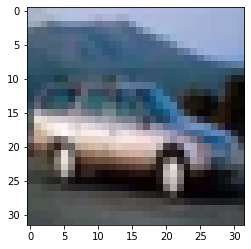

In [12]:
plt.imshow(X_train[4])

In [13]:
def plot_sample(X,y,index): #function to plot image
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]]) #in xlabel it will give class

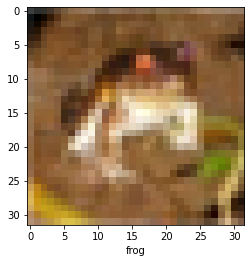

In [14]:
plot_sample(X_train,y_train,0)  #now it is added with class

In [65]:
classes[y_classes[0]] #for cat,it is giving frog

'cat'

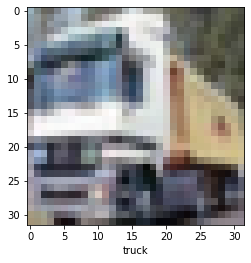

In [15]:
plot_sample(X_train,y_train,1)

In [64]:
classes[y_classes[1]] #so here for class ship it is giving truck,so we have to change it

'ship'

In [16]:
#image has 3 channels (R,G,B) and each value in channel range from 0 to 255
#To normalise in 0-1 range,we need to divide it by 255
X_train=X_train/255
X_test=X_test/255

In [17]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
#Here ANN is used just to check is it performing better than CNN and we find out CNN is better than ANN in this case

In [19]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)), #since shape is 32,32,3
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [20]:
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 178s 109ms/step - loss: 1.8861 - accuracy: 0.3276
Epoch 2/5
1563/1563 [==============================] - 165s 106ms/step - loss: 1.6560 - accuracy: 0.4060
Epoch 3/5
1563/1563 [==============================] - 163s 104ms/step - loss: 1.5746 - accuracy: 0.4351
Epoch 4/5
1563/1563 [==============================] - 158s 101ms/step - loss: 1.5209 - accuracy: 0.4548
Epoch 5/5
1563/1563 [==============================] - 165s 105ms/step - loss: 1.4837 - accuracy: 0.4685


In [22]:
#Here accuracy is only 47% ,so ann performs very badly here.
#ANN is too slower also
#So we will go for CNN
          #Convolutionaal Neural Network(CNN)

In [23]:
X_train.shape

(50000, 32, 32, 3)

In [26]:
cnn=models.Sequential([
   layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
   layers.MaxPooling2D((2,2)),
    #64 for twice of 32
   layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
   layers.MaxPooling2D((2,2)),
    
   layers.Flatten(),
   layers.Dense(64,activation='relu'),
   layers.Dense(10,activation='softmax') 
])

In [27]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 43s 26ms/step - loss: 1.4732 - accuracy: 0.4703
Epoch 2/5
1563/1563 [==============================] - 40s 25ms/step - loss: 1.1173 - accuracy: 0.6100
Epoch 3/5
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9907 - accuracy: 0.6547
Epoch 4/5
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9047 - accuracy: 0.6860
Epoch 5/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8380 - accuracy: 0.7106


In [29]:
#Here in CNN it gives 71% accuracy within 5 epochs,whereas 47% was in ANN.if we increase accuracy it will increase upto 90 maybe.

In [30]:
cnn.evaluate(X_test,y_test) #checking accuracy for our own test

313/313 [==============================] - 6s 15ms/step - loss: 0.9229 - accuracy: 0.6831


[0.9228607416152954, 0.6830999851226807]

In [42]:
y_pred=cnn.predict(X_test)

In [43]:
y_pred[:5]

array([[5.00879670e-03, 2.22368966e-04, 1.04248077e-02, 4.47315216e-01,
        3.42635973e-03, 2.18612269e-01, 1.70226060e-02, 1.32408843e-03,
        2.96294928e-01, 3.48557340e-04],
       [1.02469482e-01, 2.64460862e-01, 9.60193356e-05, 4.80676463e-05,
        2.29239067e-05, 7.54201437e-07, 1.46185846e-06, 1.78824234e-06,
        6.32255673e-01, 6.42933475e-04],
       [1.65213495e-01, 8.88888687e-02, 6.45891624e-03, 6.09569997e-03,
        3.59179825e-03, 5.54576924e-04, 5.35499246e-04, 8.06295779e-04,
        7.21981525e-01, 5.87334158e-03],
       [9.29852009e-01, 2.56826617e-02, 1.12475725e-02, 1.39380794e-03,
        1.98773183e-02, 9.71329209e-05, 4.97445522e-04, 8.91242817e-04,
        9.65878833e-03, 8.02048540e-04],
       [1.92084153e-05, 1.19262750e-05, 3.16217449e-03, 5.42499358e-03,
        7.86705017e-01, 1.27583626e-03, 2.03289196e-01, 1.01863698e-04,
        9.19913964e-06, 5.31550711e-07]], dtype=float32)

In [48]:
import numpy as np
y_classes=np.array([np.argmax(i) for i in y_pred])

In [58]:
y_classes=y_classes.astype('uint8')

In [56]:
y_classes[:5]

array([3, 8, 8, 0, 4], dtype=uint8)

In [59]:
y_test=y_test.reshape(-1,)

In [61]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

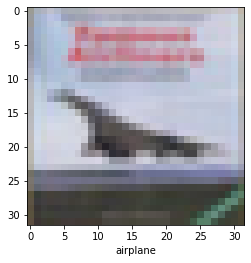

In [62]:
plot_sample(X_test,y_test,3) #checking what is image at 3

In [63]:
classes[y_classes[3]]

'airplane'

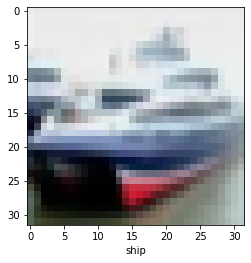

In [66]:
plot_sample(X_test,y_test,1)